<a href="https://colab.research.google.com/github/shraddha-1-1/school-managment/blob/main/inobyteAmazon_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import datetime as dt

In [44]:
data = pd.read_csv('/content/drive/MyDrive/Amazon Sale Report.csv')

In [45]:
data.head()
data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [46]:
data['Date'] = data['Date'].apply(lambda x: re.sub(r'(\d{2})-(\d{2})-(\d{4})', r'\1-\2-\2', x)
if re.match(r'\d{2}-\d{2}-\d{4}', x) else x)

In [47]:
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')
data['ship-postal-code'].fillna(0, inplace=True)
data['fulfilled-by'].fillna(data['fulfilled-by'].mode()[0], inplace=True)
data_cleaned = data.drop_duplicates()

In [48]:
print("Missing Values After Cleaning:\n", data_cleaned.isnull().sum())
print("Data Types After Cleaning:\n", data_cleaned.dtypes)
summary_stats = data_cleaned.describe()
print("Summary Statistics:\n", summary_stats)

Missing Values After Cleaning:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code           0
ship-country              33
B2B                        0
fulfilled-by               0
New                   128808
PendingS              128808
dtype: int64
Data Types After Cleaning:
 index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                  

In [49]:
frequency_counts = data_cleaned.select_dtypes(include=['object']).apply(pd.Series.value_counts)
print("Frequency Counts:\n", frequency_counts)

Frequency Counts:
                                                 Order ID  Status  Fulfilment  \
(Chikmagalur disterict).     (N.R pur thaluku)       NaN     NaN         NaN   
(Via Cuncolim)Quepem,South Goa                       NaN     NaN         NaN   
,HYDERABAD                                           NaN     NaN         NaN   
,raibarely road faizabad (Ayodhya)                   NaN     NaN         NaN   
..katra                                              NaN     NaN         NaN   
...                                                  ...     ...         ...   
yavatmal                                             NaN     NaN         NaN   
yazali                                               NaN     NaN         NaN   
yellapur                                             NaN     NaN         NaN   
zirakpur                                             NaN     NaN         NaN   
������������                                         NaN     NaN         NaN   

                    

In [50]:
data_cleaned['Month'] = data_cleaned['Date'].dt.to_period('M')
data_cleaned['Quarter'] = data_cleaned['Date'].dt.to_period('Q')
data_cleaned['Year'] = data_cleaned['Date'].dt.to_period('A')

monthly_sales = data_cleaned.groupby('Month')['Amount'].sum()
quarterly_sales = data_cleaned.groupby('Quarter')['Amount'].sum()
yearly_sales = data_cleaned.groupby('Year')['Amount'].sum()

<ipython-input-50-c78fb624129e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Month'] = data_cleaned['Date'].dt.to_period('M')
<ipython-input-50-c78fb624129e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Quarter'] = data_cleaned['Date'].dt.to_period('Q')
<ipython-input-50-c78fb624129e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

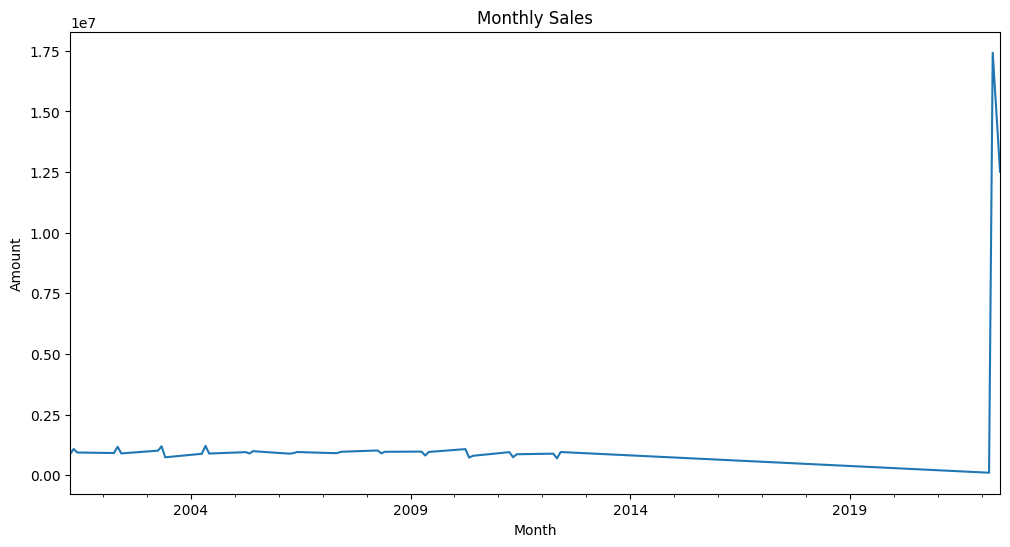

In [51]:

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', title='Monthly Sales', ylabel='Amount', xlabel='Month')
plt.show()



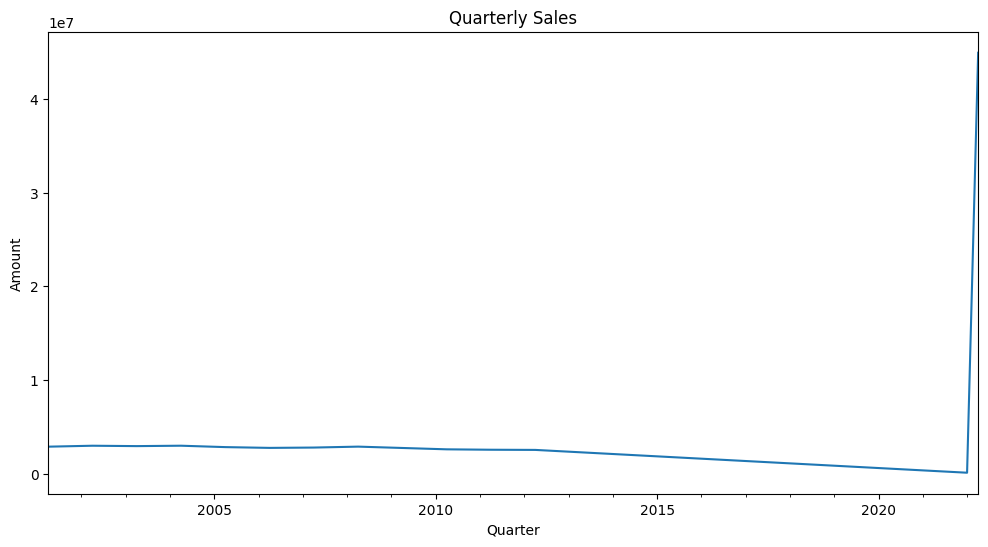

In [53]:
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', title='Quarterly Sales', ylabel='Amount', xlabel='Quarter')
plt.show()

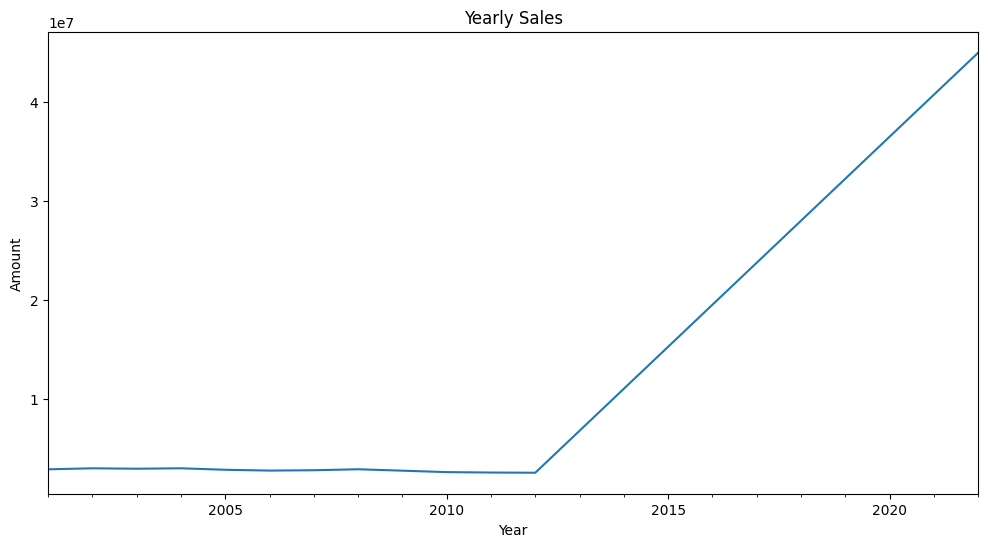

In [54]:
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', title='Yearly Sales', ylabel='Amount', xlabel='Year')
plt.show()

In [55]:
category_sales = data_cleaned.groupby('Category')['Amount'].sum()
size_sales = data_cleaned.groupby('Size')['Amount'].sum()
quantity_sales = data_cleaned['Qty'].value_counts()

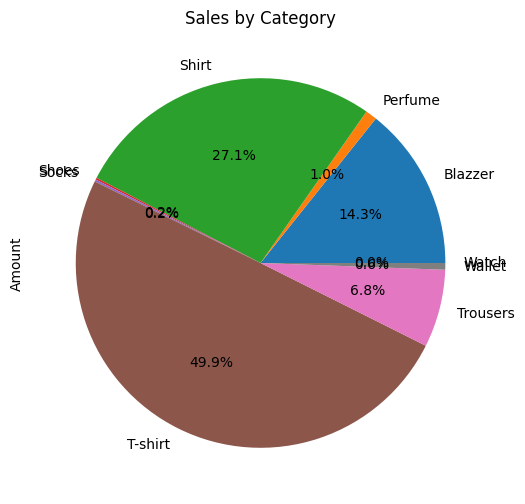

In [56]:
plt.figure(figsize=(12, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.show()

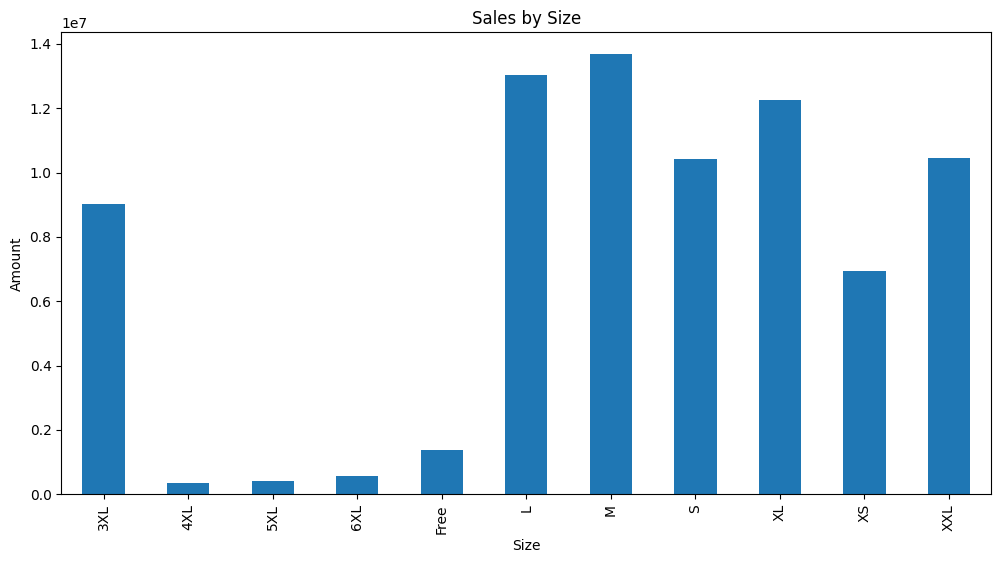

In [57]:
plt.figure(figsize=(12, 6))
size_sales.plot(kind='bar', title='Sales by Size', ylabel='Amount', xlabel='Size')
plt.show()

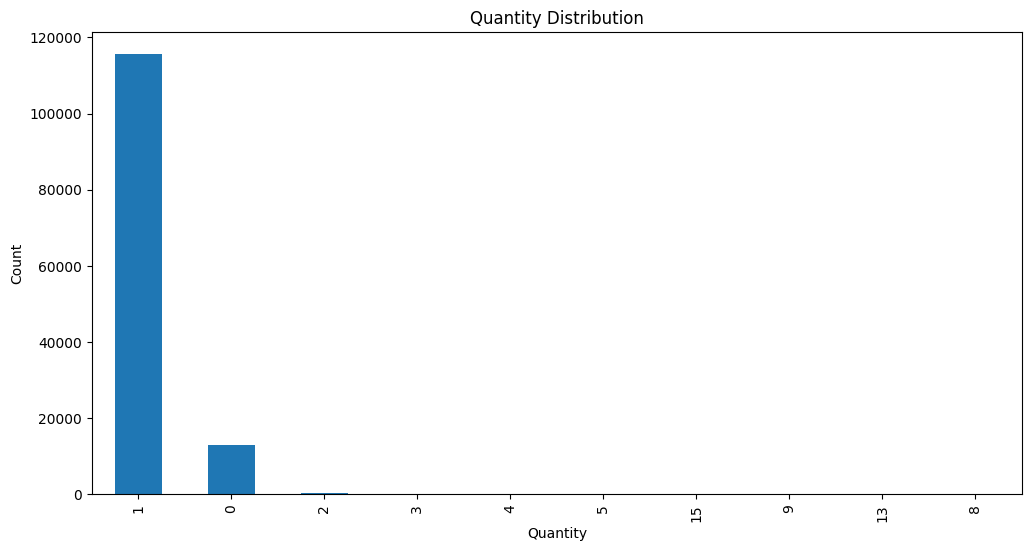

In [58]:
plt.figure(figsize=(12, 6))
quantity_sales.plot(kind='bar', title='Quantity Distribution', ylabel='Count', xlabel='Quantity')
plt.show()

In [61]:
fulfillment_performance = data_cleaned.groupby('Fulfilment')['Amount'].sum()
delivery_times = data_cleaned.groupby('Fulfilment')['Date'].apply(lambda x: (x.max() - x.min()).days)

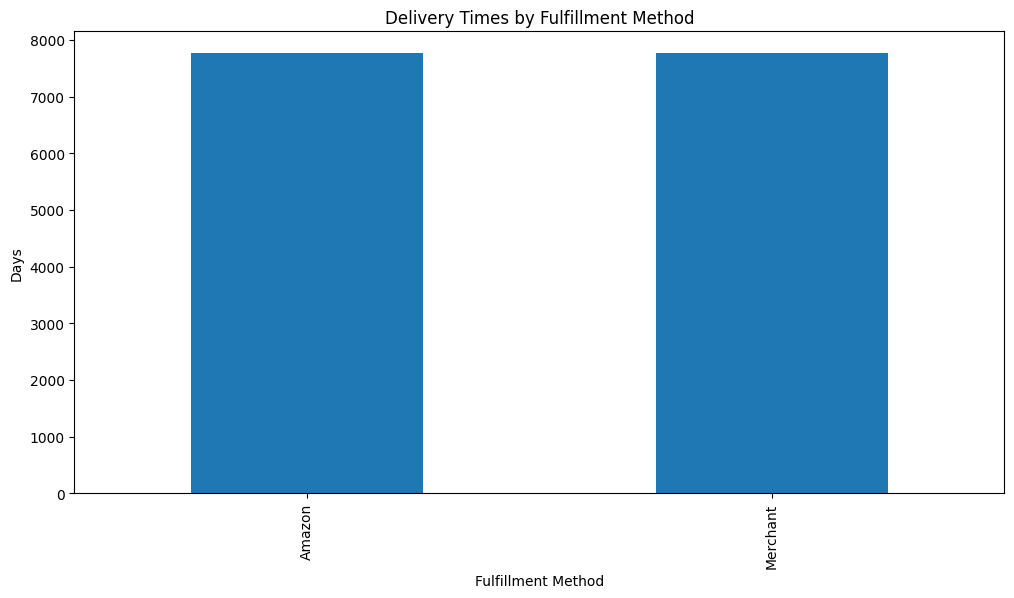

In [62]:
plt.figure(figsize=(12, 6))
delivery_times.plot(kind='bar', title='Delivery Times by Fulfillment Method', ylabel='Days', xlabel='Fulfillment Method')
plt.show()

In [64]:
customer_segments = data_cleaned.groupby('Order ID').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Date': 'count'
}).rename(columns={'Date': 'Order Count'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


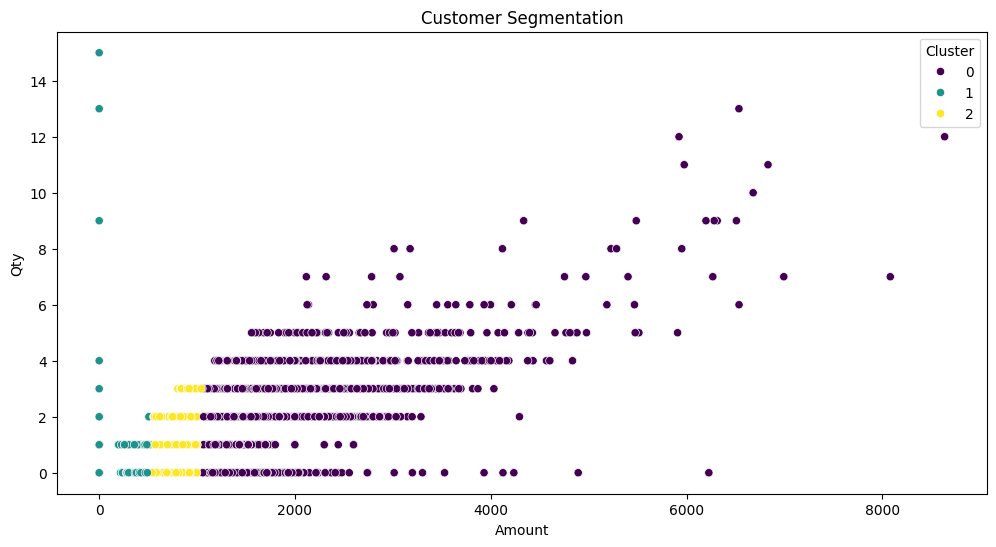

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_segments['Cluster'] = kmeans.fit_predict(customer_segments)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_segments, x='Amount', y='Qty', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()